In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Шаг 1: Загрузка данных
data = pd.read_csv('gbm-data.csv')
X = data.values[:, 1:]
y = data.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190            9.46s
         2           0.9192            9.43s
         3           0.8272            9.39s
         4           0.7834            9.29s
         5           0.7109            9.17s
         6           0.6368            8.99s
         7           0.5797            8.96s
         8           0.5610            8.77s
         9           0.5185            8.68s
        10           0.4984            8.57s
        20           0.1999            7.98s
        30           0.1313            7.50s
        40           0.0790            7.11s
        50           0.0511            6.73s
        60           0.0352            6.38s
        70           0.0245            6.04s
        80           0.0162            5.69s
        90           0.0114            5.36s
       100           0.0077            5.02s
       200           0.0002            1.67s


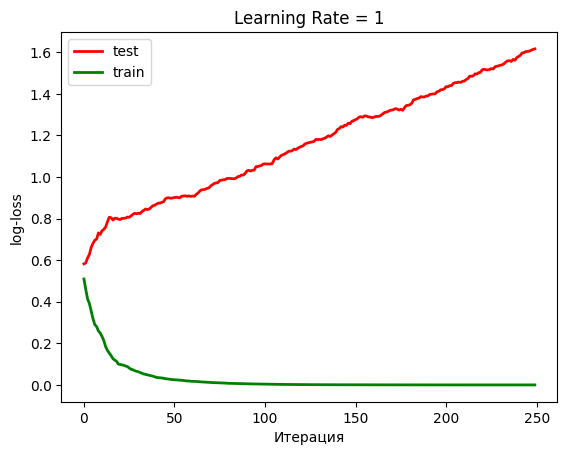

      Iter       Train Loss   Remaining Time 
         1           1.1255            8.47s
         2           1.0035            8.56s
         3           0.9386            8.48s
         4           0.8844            8.37s
         5           0.8381            8.33s
         6           0.7995            8.26s
         7           0.7559            8.19s
         8           0.7205            8.17s
         9           0.6958            8.14s
        10           0.6725            8.11s
        20           0.4672            7.72s
        30           0.3179            7.38s
        40           0.2274            7.01s
        50           0.1774            6.65s
        60           0.1394            6.32s
        70           0.1050            5.98s
        80           0.0805            5.64s
        90           0.0650            5.32s
       100           0.0511            4.99s
       200           0.0058            1.66s


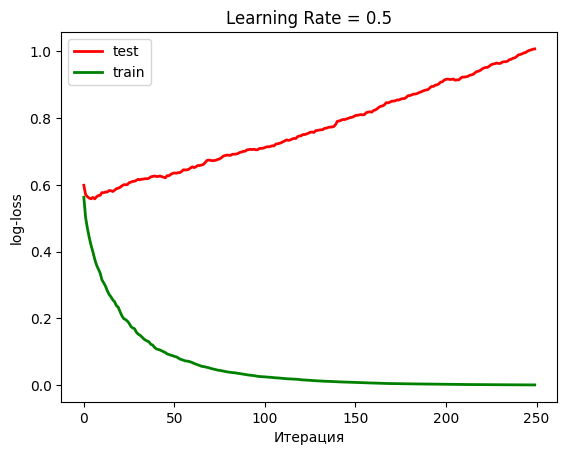

      Iter       Train Loss   Remaining Time 
         1           1.2095            8.72s
         2           1.1006            9.18s
         3           1.0240            8.98s
         4           0.9729            8.74s
         5           0.9387            8.58s
         6           0.8948            8.54s
         7           0.8621            8.47s
         8           0.8360            8.41s
         9           0.8171            8.33s
        10           0.7883            8.28s
        20           0.6029            7.80s
        30           0.4760            7.47s
        40           0.3879            7.14s
        50           0.3325            6.79s
        60           0.2759            6.49s
        70           0.2304            6.20s
        80           0.1969            5.85s
        90           0.1718            5.51s
       100           0.1404            5.20s
       200           0.0358            1.71s


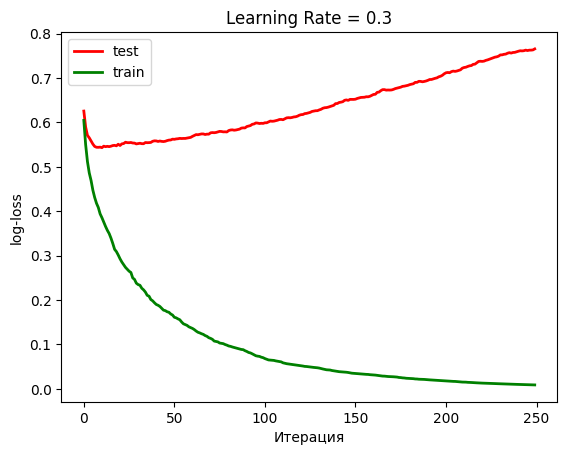

      Iter       Train Loss   Remaining Time 
         1           1.2613            8.72s
         2           1.1715            8.56s
         3           1.1009            8.48s
         4           1.0529            8.37s
         5           1.0130            8.33s
         6           0.9740            8.30s
         7           0.9475            8.23s
         8           0.9197            8.20s
         9           0.8979            8.14s
        10           0.8730            8.11s
        20           0.7207            7.74s
        30           0.6055            7.40s
        40           0.5244            7.05s
        50           0.4501            6.72s
        60           0.3908            6.36s
        70           0.3372            6.02s
        80           0.3009            5.68s
        90           0.2603            5.34s
       100           0.2327            5.00s
       200           0.0835            1.66s


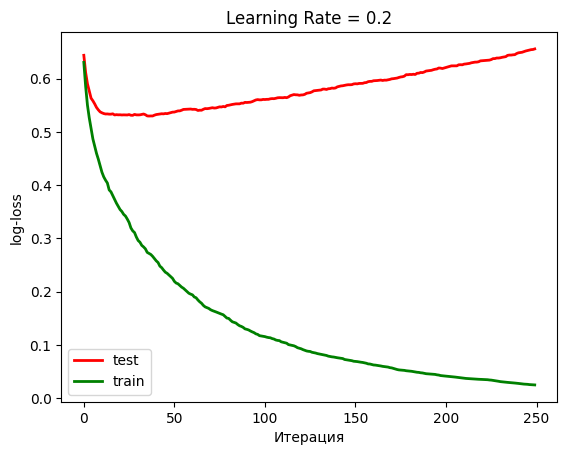

      Iter       Train Loss   Remaining Time 
         1           1.3199            8.47s
         2           1.2645            8.43s
         3           1.2170            8.32s
         4           1.1775            8.24s
         5           1.1404            8.23s
         6           1.1106            8.18s
         7           1.0844            8.16s
         8           1.0617            8.13s
         9           1.0411            8.08s
        10           1.0223            8.06s
        20           0.8864            7.68s
        30           0.7844            7.32s
        40           0.7176            6.98s
        50           0.6590            6.64s
        60           0.6120            6.30s
        70           0.5599            5.97s
        80           0.5242            5.63s
        90           0.4829            5.30s
       100           0.4473            4.97s
       200           0.2379            1.66s


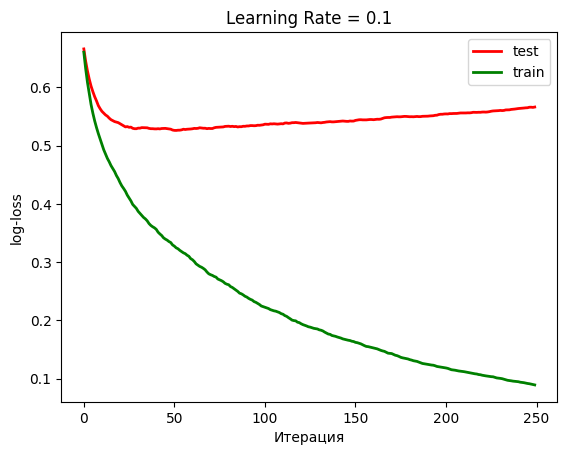

In [9]:
# Шаг 2: Обучение GradientBoostingClassifier
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
min_log_loss_values = []
min_log_loss_values_02 = []
min_log_loss_iterations = []
min_log_loss_iterations_02 = []

for learning_rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    clf.fit(X_train, y_train)

    train_loss = []
    test_loss = []
    for i, y_pred in enumerate(clf.staged_decision_function(X_train)):
        y_pred = 1 / (1 + np.exp(-y_pred))
        train_loss.append(log_loss(y_train, y_pred))

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        y_pred = 1 / (1 + np.exp(-y_pred))
        test_loss.append(log_loss(y_test, y_pred))

    min_test_loss_iter = np.argmin(test_loss) + 1
    min_test_loss = test_loss[min_test_loss_iter - 1]

    min_log_loss_values.append(min_test_loss)
    min_log_loss_iterations.append(min_test_loss_iter)

    if learning_rate == 0.2:
        min_log_loss_values_02.append(min_test_loss)
        min_log_loss_iterations_02.append(min_test_loss_iter)

    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title(f'Learning Rate = {learning_rate}')
    plt.xlabel('Итерация')
    plt.ylabel('log-loss')
    plt.show()

In [10]:
# Шаг 3: Характеристика графика
print("График:", "overfitting" if min_log_loss_iterations[np.argmin(min_log_loss_values)] > 50 else "underfitting")

График: overfitting


In [11]:
# Шаг 4: Минимальное значение log-loss
best_learning_rate_index = np.argmin(min_log_loss_values)
best_learning_rate_index_02 = np.argmin(min_log_loss_values_02)
print(f"Минимальное значение log-loss при learning_rate = 0.2: {min_log_loss_values_02[best_learning_rate_index_02]:.2f}, номер итерации: {min_log_loss_iterations_02[best_learning_rate_index_02]}")

Минимальное значение log-loss при learning_rate = 0.2: 0.53, номер итерации: 37


In [12]:
# Шаг 5: log-loss у случайного леса
best_iteration = min_log_loss_iterations[best_learning_rate_index]
rf_clf = RandomForestClassifier(n_estimators=best_iteration, random_state=241)
rf_clf.fit(X_train, y_train)
rf_pred_proba = rf_clf.predict_proba(X_test)
rf_log_loss = log_loss(y_test, rf_pred_proba)

print(f"Значение log-loss у случайного леса: {rf_log_loss:.2f}")

Значение log-loss у случайного леса: 0.54
